In [1]:
from mltrainer import CategorizerTrainer
from mlclassifier import Categorizer
from mlpreprocessor import Preprocessor
%matplotlib inline

In [2]:
categories = ['bad_habits', 'education', 'alcohol', 'animals']
# inflicted_words_path = './inflicted_words'
methods = ['SVC', 'MultinomialNB']
features = ['words_raw']
train_data_path = './train.txt'
test_data_path = './test.txt'
model_save_path = './models_categories_spacy'

In [3]:
preprocessor = Preprocessor(tokenization='spacy')
print(preprocessor._tokenization)
preprocessor.prepare_data(train_data_path, categories, features)
train_data = preprocessor.data
preprocessor.balance_data()
train_data_balanced = preprocessor.data_balanced

spacy


bad_habits: zero=46159, one=16376 
education: zero=45721, one=16814 
alcohol: zero=47164, one=15371 
animals: zero=48432, one=14103 


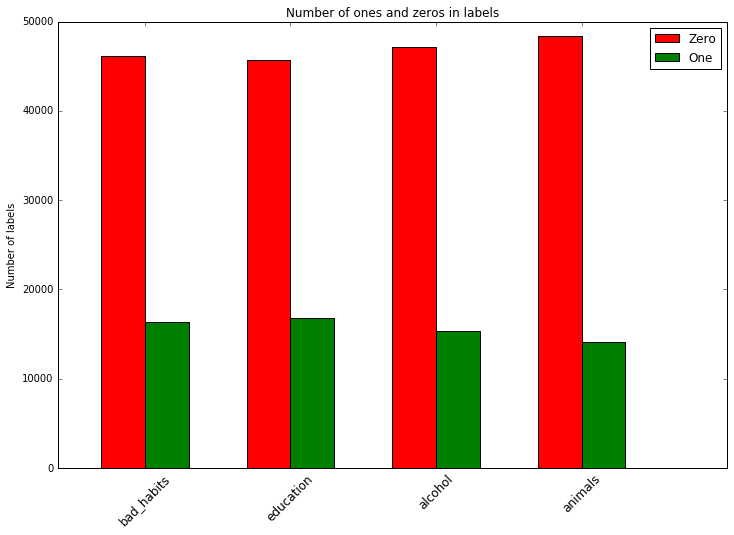

In [4]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=16376, one=16376 
education: zero=16814, one=16814 
alcohol: zero=15371, one=15371 
animals: zero=14103, one=14103 


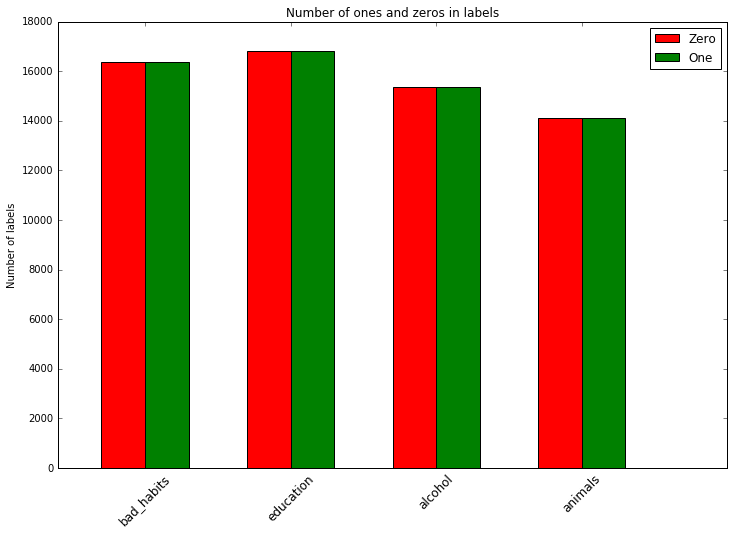

In [5]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [6]:
trainer1 = CategorizerTrainer()
# trainer1.set_inflicted_words(inflicted_words_path)
trainer1.fit(train_data_balanced, methods, categories, features)
trainer1.save_models(model_save_path)

In [7]:
preprocessor.prepare_data(test_data_path, categories, features)
test_data = preprocessor.data
preprocessor.balance_data()
test_data_balanced = preprocessor.data_balanced

bad_habits: zero=11717, one=3917 
education: zero=11247, one=4387 
alcohol: zero=11820, one=3814 
animals: zero=12094, one=3540 


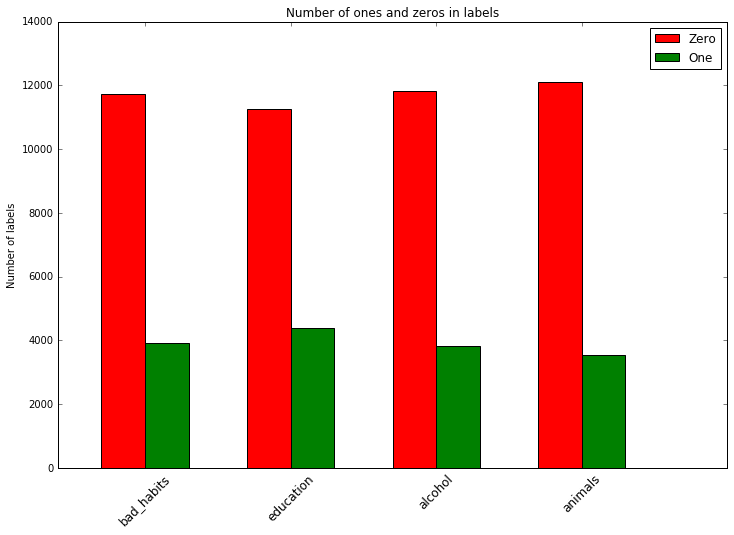

In [8]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=3917, one=3917 
education: zero=4387, one=4387 
alcohol: zero=3814, one=3814 
animals: zero=3540, one=3540 


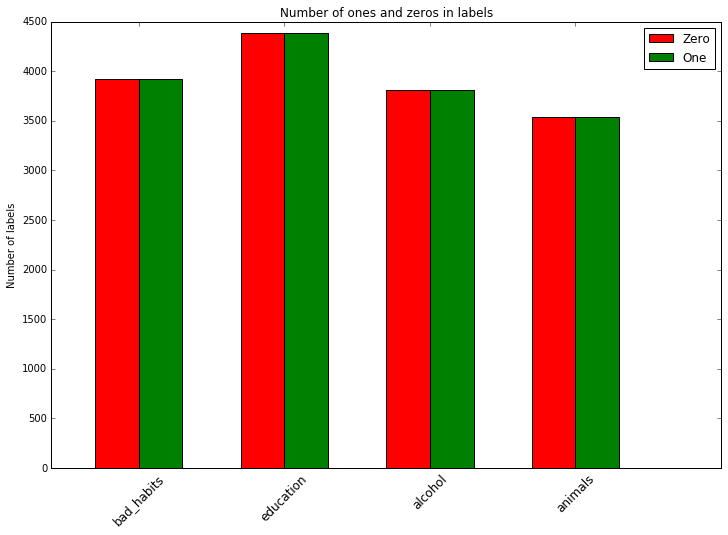

In [9]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [10]:
trainer1.evaluate_models(test_data_balanced, save_metrics=True)
trainer1.print_metrics()

Model method: SVC
Category: alcohol
acc=0.8767697954902989 total=7628 rc=0.8109596224436287 f1=0.8680886893067639 pr=0.9338768115942029 correct=6688 confusion_matrix=[[3595, 219], [721, 3093]]
Category: bad_habits
acc=0.8738830737809549 total=7834 rc=0.8128669900434006 f1=0.8656878738444806 pr=0.9258505379470776 correct=6846 confusion_matrix=[[3662, 255], [733, 3184]]
Category: animals
acc=0.8717514124293785 total=7080 rc=0.9081920903954802 f1=0.8762605614608886 pr=0.8464981569246972 correct=6172 confusion_matrix=[[2957, 583], [325, 3215]]
Category: education
acc=0.880214269432414 total=8774 rc=0.8174150900387509 f1=0.872187766022133 pr=0.9348279457768509 correct=7723 confusion_matrix=[[4137, 250], [801, 3586]]


Model method: MultinomialNB
Category: alcohol
acc=0.8685107498689041 total=7628 rc=0.834556895647614 f1=0.8638892658433981 pr=0.8953586497890296 correct=6625 confusion_matrix=[[3442, 372], [631, 3183]]
Category: bad_habits
acc=0.862777635945877 total=7834 rc=0.8432473832014297

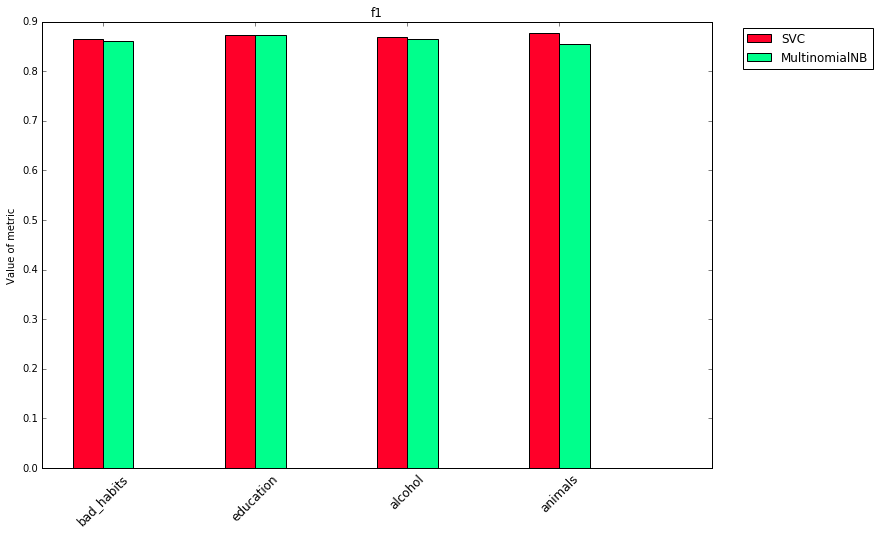

In [11]:
trainer1.draw_metrics('f1')

In [12]:
trainer2 = CategorizerTrainer()
trainer2.load_models(model_save_path)
print(trainer2._tokenization)

spacy


In [13]:
preprocessor2 = Preprocessor(tokenization='spacy')
print(preprocessor2._tokenization)
preprocessor2.prepare_data(test_data_path, categories, features)
test_data2= preprocessor2.data

trainer2.evaluate_models(test_data2)
trainer2.print_metrics()

spacy
Model method: SVC
Category: alcohol
acc=0.9088525009594474 total=15634 rc=0.8143681174619821 f1=0.8134084064423203 pr=0.8124509547475804 correct=14209 confusion_matrix=[[11103, 717], [708, 3106]]
Category: bad_habits
acc=0.9022003326084176 total=15634 rc=0.8166964513658412 f1=0.8071149236785669 pr=0.7977556109725685 correct=14105 confusion_matrix=[[10906, 811], [718, 3199]]
Category: animals
acc=0.8492388384290649 total=15634 rc=0.9112994350282486 f1=0.732432739243955 pr=0.6122603909660277 correct=13277 confusion_matrix=[[10051, 2043], [314, 3226]]
Category: education
acc=0.9053345273122682 total=15634 rc=0.8206063369044906 f1=0.8294930875576036 pr=0.8385744234800838 correct=14154 confusion_matrix=[[10554, 693], [787, 3600]]


Model method: MultinomialNB
Category: alcohol
acc=0.8814123065114494 total=15634 rc=0.8416360776088097 f1=0.775924583031182 pr=0.7197309417040358 correct=13780 confusion_matrix=[[10570, 1250], [604, 3210]]
Category: bad_habits
acc=0.8752078802609696 total=1

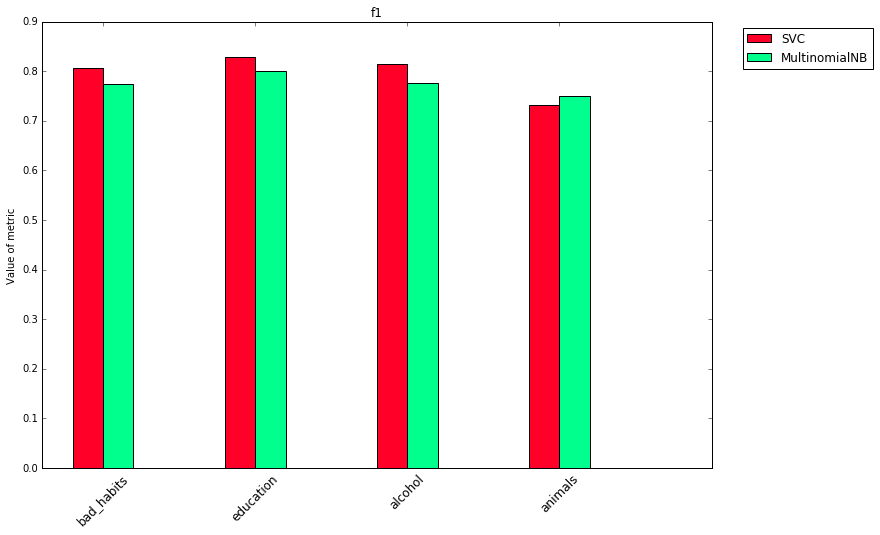

In [14]:
trainer2.draw_metrics('f1')